In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=13)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=12)
    plt.yticks(tick_marks, classes, fontsize=12)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=12)
    plt.xlabel('\nPredicted label', fontsize=12)
    plt.tight_layout()

In [5]:
def metrics(Dataset,name): 
    print("accuracy_score  = ", accuracy_score(Dataset.label, Dataset.model_predict))
    print("precision_score  = ", precision_score(Dataset.label, Dataset.model_predict, average=None))
    print("recall_score  = ", recall_score(Dataset.label, Dataset.model_predict, average=None))
    plt.figure(figsize=(4,5))
    plt.bar([0,1,2], Dataset.model_predict.value_counts().sort_index(), color=['#fbea9d', '#5db396' , '#e15e60'])
    plt.title('{} dataset model_predict'.format(name), fontsize=13)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    plt.figure(figsize=(4,5))
    plt.bar([0,1,2], Dataset.label.value_counts().sort_index(), color=['#fbea9d', '#5db396' , '#e15e60'])
    plt.title('{} dataset label'.format(name), fontsize=13)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

# https://habr.com/ru/company/ods/blog/328372/ про метрики

In [6]:
women_df = pd.read_csv('drive/MyDrive/csv/women_with_predict.csv', lineterminator='\n')

In [7]:
women_df

,id,text,label,model_predict
0,0,качество плохое пошив ужасный (горловина напер...,2,2
1,1,"Товар отдали другому человеку, я не получила...",2,2
2,2,"Ужасная синтетика! Тонкая, ничего общего с пре...",2,2
3,3,"товар не пришел, продавец продлил защиту без...",2,2
4,4,"Кофточка голая синтетика, носить не возможно.",2,0
...,...,...,...,...
84751,89009,сделано достаточно хорошо. на ткани сделан рис...,1,1
84752,89010,Накидка шикарная. Спасибо большое провдо линяе...,1,1
84753,89011,спасибо большое ) продовца рекомендую.. заказа...,1,1
84754,89012,Очень довольна заказом! Меньше месяца в РБ. К...,1,1


accuracy_score  =  0.7698334041247817
precision_score  =  [0.72 0.91 0.69]
recall_score  =  [0.54 0.88 0.88]


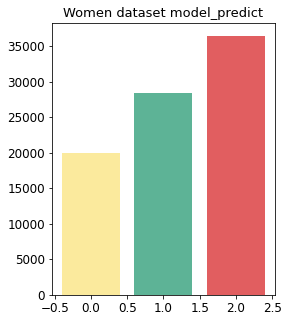

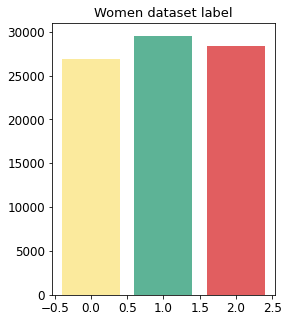

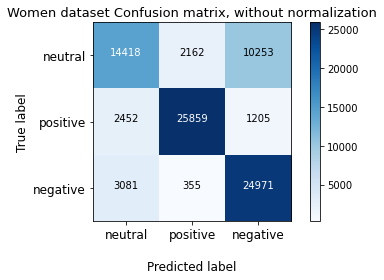

In [8]:
cnf_matrix_women_df = confusion_matrix(women_df.label, women_df.model_predict, labels=[0, 1, 2])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
metrics(women_df, "Women")
plt.figure(figsize=(6,4))
plot_confusion_matrix(cnf_matrix_women_df, normalize=False, classes=['neutral', 'positive', 'negative'],
title='Women dataset Confusion matrix, without normalization')

In [9]:
wildberries_df = pd.read_csv('drive/MyDrive/csv/wildberries_with_predict.csv')

In [10]:
wildberries_df

,id,text,label,model_predict
0,0,"Всё норм. Мужу понравилось, как всегда.",1,1
1,1,Все пришло попробовал отлично,1,1
2,2,"Супер! Оригинал, выгодней намного чем в магази...",1,1
3,3,"Шикарные лезвия, 4 штуки в упаковке (фоткала у...",1,1
4,4,На первый взгляд очень даже хорошие кассеты. П...,1,0
...,...,...,...,...
70078,70078,Для тренировок в сммый раз,1,0
70079,70079,Хорошая майка,1,1
70080,70080,Майка не понравилась-очень тонкий материал!,2,0
70081,70081,На рост 190 см Вес 94 кг .подошел отлично разм...,1,1


accuracy_score  =  0.7794044204728678
precision_score  =  [0.2  0.94 0.52]
recall_score  =  [0.39 0.85 0.52]


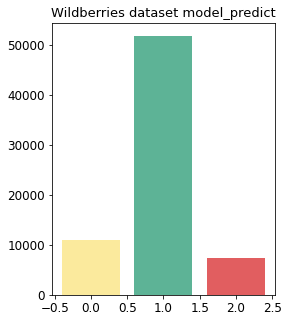

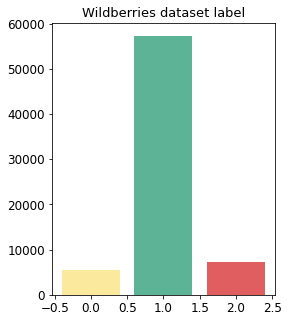

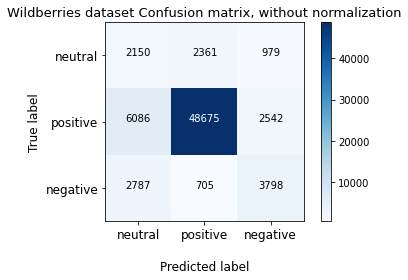

In [11]:
cnf_matrix_wildberries_df = confusion_matrix(wildberries_df.label, wildberries_df.model_predict, labels=[0, 1, 2])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
metrics(wildberries_df, "Wildberries")
plt.figure(figsize=(6,4))
plot_confusion_matrix(cnf_matrix_wildberries_df, normalize=False, classes=['neutral', 'positive', 'negative'],
title='Wildberries dataset Confusion matrix, without normalization')

In [12]:
reviews_df = pd.read_csv('drive/MyDrive/csv/reviews_with_predict.csv')

In [13]:
reviews_df

,id,text,label,model_predict
0,0,"парфюм оригинальный . все , профессиональный ...",1,1
1,1,любимый dkny . запах просто шикарный . спасибо...,1,1
2,2,шикарный запах ! безумно нравиться ! не пожале...,1,1
3,3,иісі қатты ұнады .,1,1
4,4,"запах просто классный , то , нужно летний вр...",0,0
...,...,...,...,...
118651,119043,"звук высокий средний , немного токсичный высо...",1,1
118652,119044,"вполне сносный наушник , но , думать , не с...",0,1
118653,119045,наушник просто супер,1,1
118654,119046,все супер бас маловато,0,1


accuracy_score  =  0.7484071601941747
precision_score  =  [0.18 0.91 0.26]
recall_score  =  [0.25 0.83 0.41]


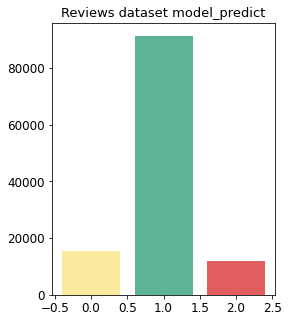

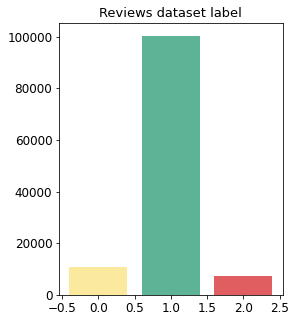

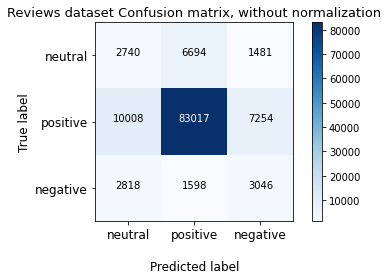

In [14]:
cnf_matrix_reviews_df = confusion_matrix(reviews_df.label, reviews_df.model_predict, labels=[0, 1, 2])
np.set_printoptions(precision=2)
metrics(reviews_df, "Reviews")
# Plot non-normalized confusion matrix
plt.figure(figsize=(6,4))
plot_confusion_matrix(cnf_matrix_reviews_df, normalize=False, classes=['neutral', 'positive', 'negative'],
title='Reviews dataset Confusion matrix, without normalization')

In [15]:
phone_df1 = pd.read_csv('drive/MyDrive/csv/phone1_with_predict.csv')

In [16]:
phone_df2 = pd.read_csv('drive/MyDrive/csv/phone2_with_predict.csv')

In [17]:
phone_df3 = pd.read_csv('drive/MyDrive/csv/phone3_with_predict.csv')

In [18]:
phone_df4 = pd.read_csv('drive/MyDrive/csv/phone4_with_predict.csv')

In [19]:
phone_df5 = pd.read_csv('drive/MyDrive/csv/phone5_with_predict.csv')

In [20]:
phone_df = pd.concat([phone_df1,phone_df2,phone_df3,phone_df4,phone_df5]).reset_index()

In [21]:
phone_df

,index,id,text,label,model_predict
0,0,0,3D Touch просто восхитительная вещь! Заряд дер...,1,1
1,1,1,"Отключается при температуре близкой к нулю, не...",0,2
2,2,2,"В Apple окончательно решили не заморачиваться,...",2,0
3,3,3,Постарался наиболее ёмко и коротко описать все...,0,0
4,4,4,Достойный телефон. Пользоваться одно удовольст...,1,1
...,...,...,...,...,...
478045,78046,478913,"часов разговоров, изредка пробки, инет очень ...",1,2
478046,78047,478914,мой первый аппарат на андроиде. На данный моме...,1,0
478047,78048,478915,"часа wi-fi, 1 час разговоров, 1 час радио/мр3...",1,1
478048,78049,478916,Разбил iphone и не было желания покупать новый...,1,1


accuracy_score  =  0.5286831921347139
precision_score  =  [0.25 0.66 0.55]
recall_score  =  [0.29 0.64 0.51]


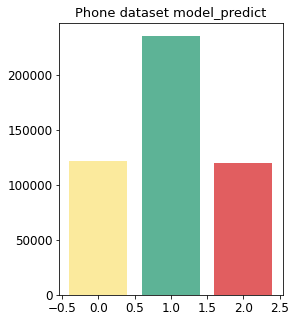

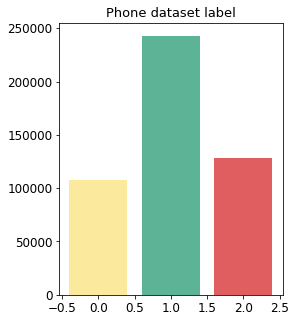

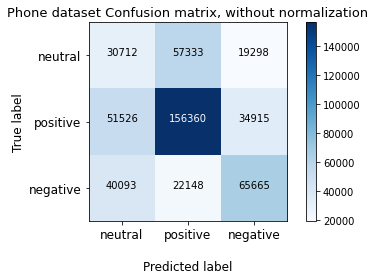

In [22]:
cnf_matrix_phone_df = confusion_matrix(phone_df.label, phone_df.model_predict, labels=[0, 1, 2])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
metrics(phone_df, "Phone")
plt.figure(figsize=(6,4))
plot_confusion_matrix(cnf_matrix_phone_df, normalize=False, classes=['neutral', 'positive', 'negative'],
title='Phone dataset Confusion matrix, without normalization')

In [23]:
hotel_df = pd.read_csv('drive/MyDrive/csv/hotel_with_predict.csv')

In [24]:
hotel_df

,id,text,label,model_predict
0,0,"Очень достойный отель с прекрасными номерами, ...",0,1
1,1,"Остановились в Барселоне проездом, т.к. нужно ...",0,1
2,2,Типичная сетевая гостиница. Главный плюс-шикар...,0,1
3,3,"Начнем с того, что в этом отеле не берут деньг...",2,2
4,4,"Отель находится в отдалении от центра,но пешко...",1,1
...,...,...,...,...
56620,6871,"Для нас было плюсом, что в этом отеле можно ос...",1,1
56621,6872,Очень понравился отель.Хорошие номера с кухней...,1,1
56622,6873,"В Петербурге бываю очень часто, поэтому появле...",1,0
56623,6874,Изумительное место! Я просто не ожидала такого...,1,1


accuracy_score  =  0.5746401766004415
precision_score  =  [0.36 0.58 0.72]
recall_score  =  [0.11 0.95 0.33]


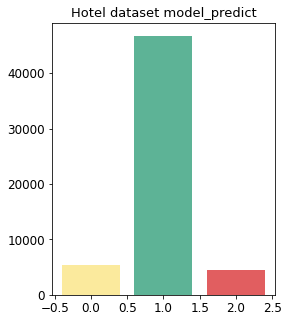

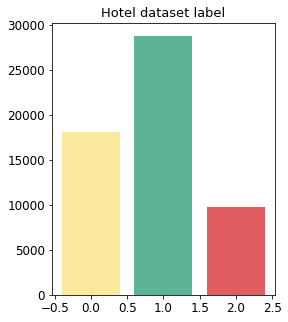

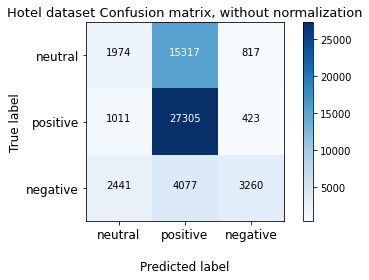

In [25]:
cnf_matrix_hotel_df = confusion_matrix(hotel_df.label, hotel_df.model_predict, labels=[0, 1, 2])
np.set_printoptions(precision=2)
metrics(hotel_df, "Hotel")
# Plot non-normalized confusion matrix
plt.figure(figsize=(6,4))
plot_confusion_matrix(cnf_matrix_hotel_df, normalize=False, classes=['neutral', 'positive', 'negative'],
title='Hotel dataset Confusion matrix, without normalization')

In [26]:
combined_df = pd.concat([phone_df, hotel_df, reviews_df, wildberries_df, women_df]).reset_index()
combined_df=combined_df.drop(labels=["id","index","level_0"], axis = 1)

In [27]:
combined_df

,text,label,model_predict
0,3D Touch просто восхитительная вещь! Заряд дер...,1,1
1,"Отключается при температуре близкой к нулю, не...",0,2
2,"В Apple окончательно решили не заморачиваться,...",2,0
3,Постарался наиболее ёмко и коротко описать все...,0,0
4,Достойный телефон. Пользоваться одно удовольст...,1,1
...,...,...,...
808165,сделано достаточно хорошо. на ткани сделан рис...,1,1
808166,Накидка шикарная. Спасибо большое провдо линяе...,1,1
808167,спасибо большое ) продовца рекомендую.. заказа...,1,1
808168,Очень довольна заказом! Меньше месяца в РБ. К...,1,1


accuracy_score  =  0.6111956642785552
precision_score  =  [0.3  0.75 0.56]
recall_score  =  [0.31 0.74 0.56]


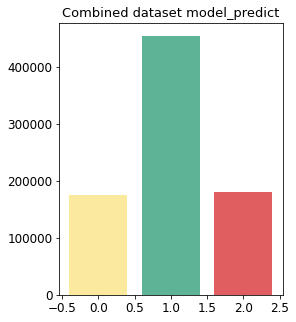

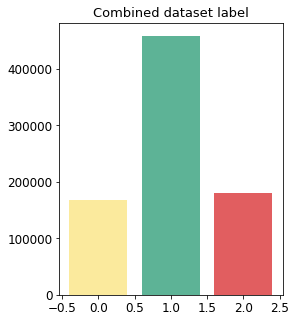

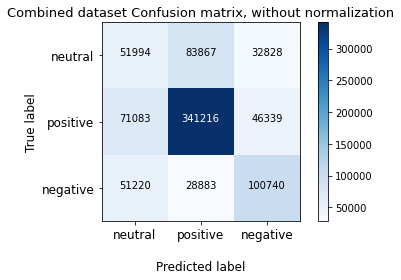

In [28]:
cnf_matrix_combined_df = confusion_matrix(combined_df.label, combined_df.model_predict, labels=[0, 1, 2])
np.set_printoptions(precision=2)
metrics(combined_df, "Сombined")
# Plot non-normalized confusion matrix
plt.figure(figsize=(6,4))
plot_confusion_matrix(cnf_matrix_combined_df, normalize=False, classes=['neutral', 'positive', 'negative'],
title='Сombined dataset Confusion matrix, without normalization')
